In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [46]:
data = pd.read_csv(r"C:\Users\ADMIN\Vinamilk.csv")
print(data)


            Date     Close      Open      High      Low     Vol. Change %
0     16/01/2017   99924.0  100319.0  100398.0  99845.0  723.16K   -0.32%
1     17/01/2017   99608.0  100082.0  100082.0  99608.0  698.86K   -0.32%
2     18/01/2017   99529.0   99529.0   99687.0  98897.0    1.02M   -0.08%
3     19/01/2017   99529.0   99766.0   99766.0  99450.0    1.04M    0.00%
4     20/01/2017  100319.0   99529.0  101346.0  99529.0    1.91M    0.79%
...          ...       ...       ...       ...      ...      ...      ...
1724  11/12/2023   70000.0   70500.0   70500.0  69900.0    4.73M    1.45%
1725  12/12/2023   69400.0   70000.0   70100.0  69000.0    2.79M   -0.86%
1726  13/12/2023   68200.0   69600.0   69700.0  68100.0    4.51M   -1.73%
1727  14/12/2023   68400.0   68400.0   68900.0  68200.0    1.46M    0.29%
1728  15/12/2023   68100.0   68500.0   68600.0  68100.0    3.74M   -0.44%

[1729 rows x 7 columns]


In [11]:
data.describe()


,Close,Open,High,Low
count,1729.000000,1729.00000,1729.000000,1729.000000
mean,97543.479584,97543.98288,98436.947195,96692.254482
std,25289.388548,25238.39568,25491.096501,25015.534180
min,61260.100000,61829.90000,63159.600000,61260.100000
25%,78000.000000,78000.00000,78889.500000,77100.000000
50%,94612.300000,94746.00000,95551.000000,93933.000000
75%,106269.000000,106269.00000,106898.000000,105611.000000
max,175578.000000,175333.00000,175742.000000,174189.000000


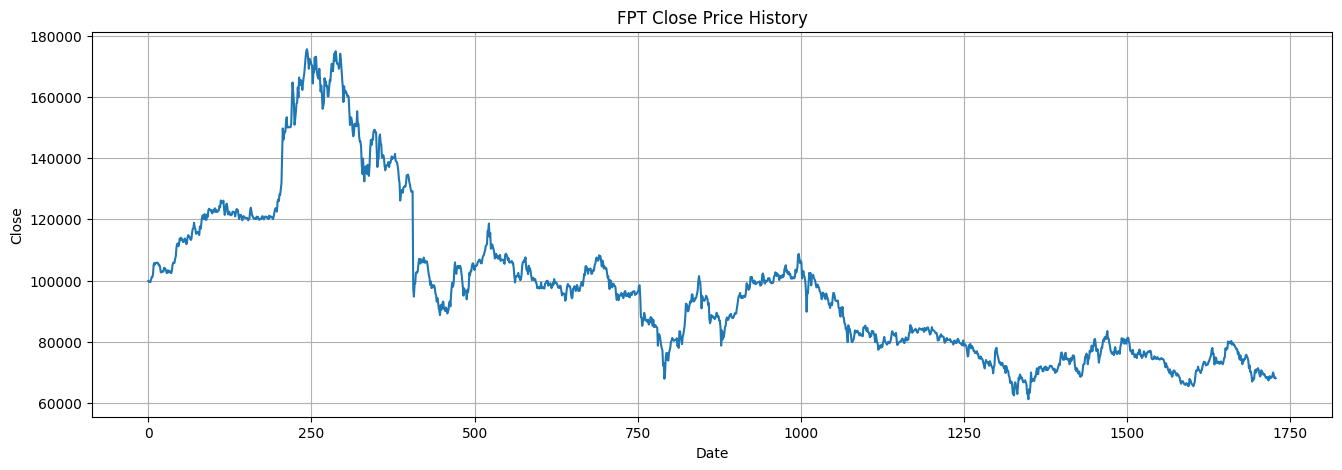

In [12]:


plt.figure(figsize=(16,5))
plt.plot(data["Close"])
plt.title('FPT Close Price History')
plt.xlabel('Date')  # Đặt tên cho trục x
plt.ylabel('Close')  # Đặt tên cho trục y
plt.grid(True)
plt.show()

In [13]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [14]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [16]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)


In [17]:
#Creating an index for the next 30 days.
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[55716.27735766 55669.96414789 55623.65093813 55577.33772837
 55531.02451861 55484.71130884 55438.39809908 55392.08488932
 55345.77167956 55299.45846979 55253.14526003 55206.83205027
 55160.51884051 55114.20563075 55067.89242098 55021.57921122
 54975.26600146 54928.9527917  54882.63958193 54836.32637217
 54790.01316241 54743.69995265 54697.38674288 54651.07353312
 54604.76032336 54558.4471136  54512.13390383 54465.82069407
 54419.50748431 54373.19427455]


In [18]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 12816.86579275168
Testing RMSE: 7128.59835464988


In [19]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 11926.71908697878
Testing MAE: 5624.781279400883


In [20]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 16.38627545544351
Testing MAPE: 7.527413226231239


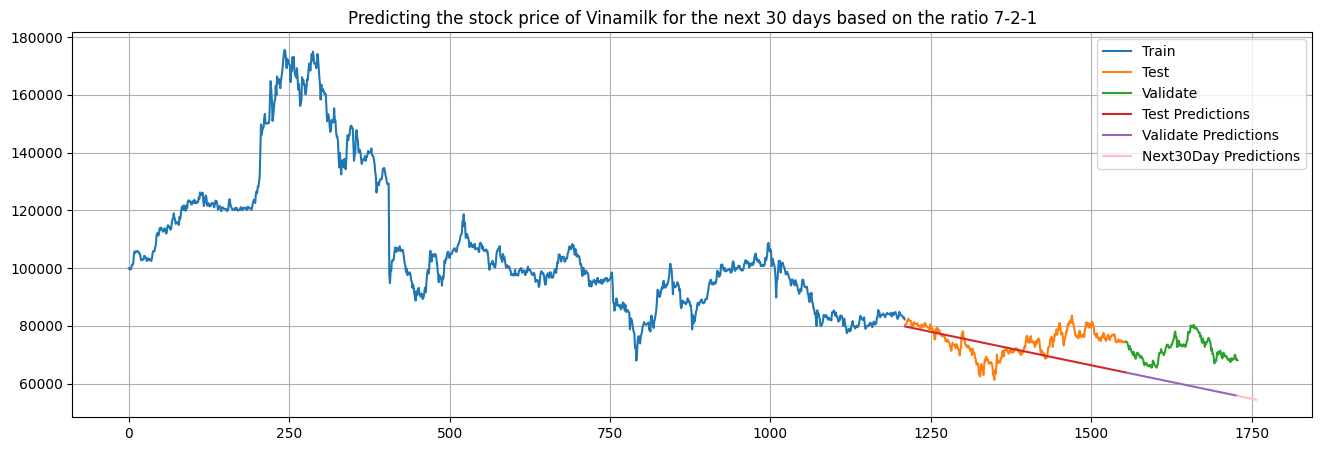

In [43]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Predicting the stock price of Vinamilk for the next 30 days based on the ratio 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [22]:
# Split the data into training, testing, and validation sets
train_size2 = int(0.6 * len(data))
test_size2 = int(0.3 * len(data))
val_size2 = len(data) - train_size2 - test_size2

In [23]:
train_data2 = data[:train_size2]
test_data2 = data[train_size2:train_size2+test_size2]
val_data2 = data[train_size2+test_size2:]

In [24]:
#Training data
x_train2 = np.array(train_data2.index).reshape(-1, 1)
y_train2 = np.array(train_data2['Close'])

# Train the linear regression model
model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [25]:
# Testing data
x_test2 = np.array(test_data2.index).reshape(-1, 1)
y_test2 = np.array(test_data2['Close'])
y_pred2 = model2.predict(x_test2)

#Validate data
x_val2= np.array(val_data2.index).reshape(-1, 1)
y_val2 = np.array(val_data2['Close'])
y_pred_val2 =  model2.predict(x_val2)

In [26]:
#Creating an index for the next 30 days.
last_index2 =  data.index[-1]
last_data2 = pd.RangeIndex(start=last_index2, stop=last_index2+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days2 = np.array(range(last_index2+1, last_index2+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days2 = model.predict(x_next_30_days2)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days2)

Predicted closing prices for the next 30 days:
[55716.27735766 55669.96414789 55623.65093813 55577.33772837
 55531.02451861 55484.71130884 55438.39809908 55392.08488932
 55345.77167956 55299.45846979 55253.14526003 55206.83205027
 55160.51884051 55114.20563075 55067.89242098 55021.57921122
 54975.26600146 54928.9527917  54882.63958193 54836.32637217
 54790.01316241 54743.69995265 54697.38674288 54651.07353312
 54604.76032336 54558.4471136  54512.13390383 54465.82069407
 54419.50748431 54373.19427455]


In [27]:
#RMSE
valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - y_val2)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
print('Validation RMSE:', valid_rmse2)
print('Testing RMSE:', test_rmse2)

Validation RMSE: 13177.32488709466
Testing RMSE: 6305.905117405964


In [28]:
#MAE
valid_mae2 = mean_absolute_error(y_val2,y_pred_val2)
test_mae2 = mean_absolute_error(y_test2, y_pred2)
print('Validation MAE:', valid_mae2)
print('Testing MAE:', test_mae2)

Validation MAE: 12309.738374254388
Testing MAE: 4851.783975312008


In [30]:
#MAPE
valid_mape2 = np.mean(np.abs((y_val2 - y_pred_val2) / y_val2))*100
test_mape2 = np.mean(np.abs((y_test2 - y_pred2) / y_test2))*100
print('Validation MAPE:', valid_mape2)
print('Testing MAPE:', test_mape2)

Validation MAPE: 16.921785339777426
Testing MAPE: 6.31172816114557


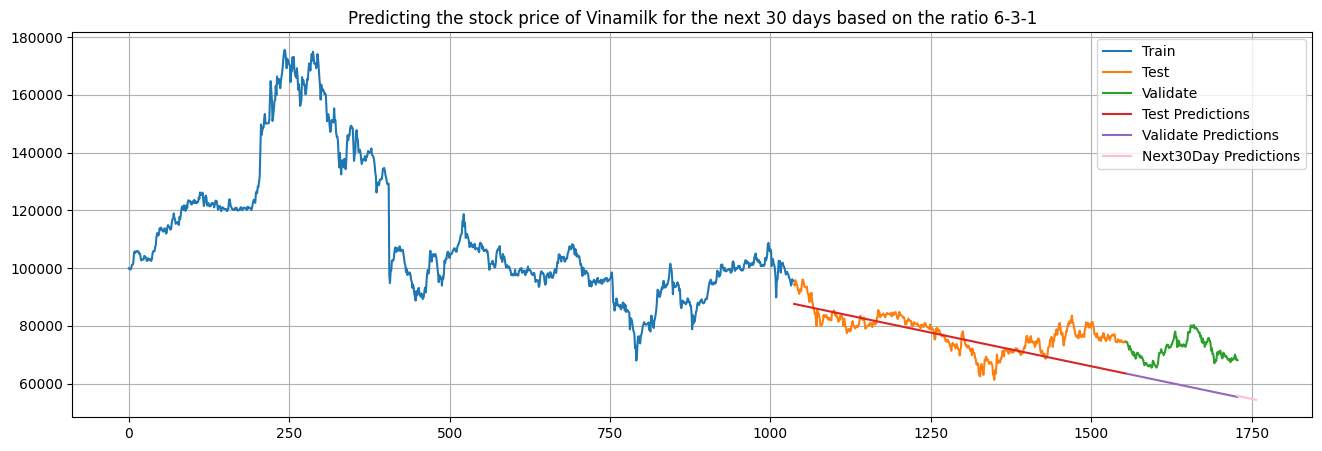

In [42]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Predicting the stock price of Vinamilk for the next 30 days based on the ratio 6-3-1")

plt.plot(train_data2.index, train_data2['Close'])
plt.plot(test_data2.index, test_data2['Close'])
plt.plot(val_data2.index, val_data2['Close'])
plt.plot(test_data2.index, y_pred2)
plt.plot(val_data2.index, y_pred_val2)
plt.plot(last_data2,y_next_30_days2, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [32]:
# Split the data into training, testing, and validation sets
train_size3 = int(0.5 * len(data))
test_size3 = int(0.3 * len(data))
val_size3 = len(data) - train_size3 - test_size3

In [33]:
train_data3 = data[:train_size3]
test_data3 = data[train_size3:train_size3+test_size3]
val_data3 = data[train_size3+test_size3:]

In [34]:
#Training data
x_train3 = np.array(train_data3.index).reshape(-1, 1)
y_train3 = np.array(train_data3['Close'])

# Train the linear regression model
model3 = LinearRegression()
model3.fit(x_train3, y_train3)

LinearRegression()

In [35]:
# Testing data
x_test3 = np.array(test_data3.index).reshape(-1, 1)
y_test3 = np.array(test_data3['Close'])
y_pred3 = model3.predict(x_test3)

#Validate data
x_val3= np.array(val_data3.index).reshape(-1, 1)
y_val3 = np.array(val_data3['Close'])
y_pred_val3 =  model3.predict(x_val3)

In [36]:
#Creating an index for the next 30 days.
last_index3 =  data.index[-1]
last_data3 = pd.RangeIndex(start=last_index3, stop=last_index3+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days3 = np.array(range(last_index3+1, last_index3+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days3 = model3.predict(x_next_30_days3)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days3)

Predicted closing prices for the next 30 days:
[41314.59231739 41258.01648304 41201.44064869 41144.86481435
 41088.28898    41031.71314565 40975.1373113  40918.56147695
 40861.9856426  40805.40980826 40748.83397391 40692.25813956
 40635.68230521 40579.10647086 40522.53063651 40465.95480217
 40409.37896782 40352.80313347 40296.22729912 40239.65146477
 40183.07563042 40126.49979608 40069.92396173 40013.34812738
 39956.77229303 39900.19645868 39843.62062434 39787.04478999
 39730.46895564 39673.89312129]


In [37]:
#RMSE
valid_rmse3 = np.sqrt(np.mean((y_pred_val3 - y_val3)**2))
test_rmse3 = np.sqrt(np.mean((y_pred3 - y_test3)**2))
print('Validation RMSE:', valid_rmse3)
print('Testing RMSE:', test_rmse3)

Validation RMSE: 23263.863639322353
Testing RMSE: 10950.016441458565


In [38]:
#MAE
valid_mae3 = mean_absolute_error(y_val3,y_pred_val3)
test_mae3 = mean_absolute_error(y_test3, y_pred3)
print('Validation MAE:', valid_mae3)
print('Testing MAE:', test_mae3)

Validation MAE: 22534.696079499703
Testing MAE: 9613.901726495724


In [39]:
#MAPE
valid_mape3 = np.mean(np.abs((y_val3 - y_pred_val3) / y_val3))*100
test_mape3 = np.mean(np.abs((y_test3 - y_pred3) / y_test3))*100
print('Validation MAPE:', valid_mape3)
print('Testing MAPE:', test_mape3)

Validation MAPE: 30.512320111002527
Testing MAPE: 10.967529500212091


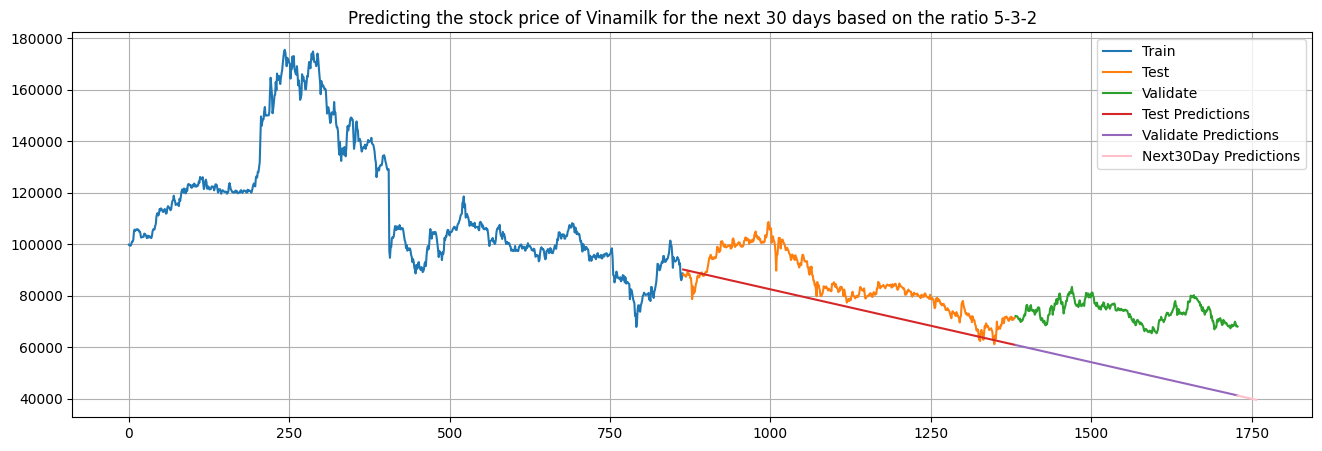

In [44]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Predicting the stock price of Vinamilk for the next 30 days based on the ratio 5-3-2")

plt.plot(train_data3.index, train_data3['Close'])
plt.plot(test_data3.index, test_data3['Close'])
plt.plot(val_data3.index, val_data3['Close'])
plt.plot(test_data3.index, y_pred3)
plt.plot(val_data3.index, y_pred_val3)
plt.plot(last_data3,y_next_30_days3, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [45]:
Vinamilk

NameError: name 'Vinamilk' is not defined